    Accuracy  Avg. Time  Cluster
0      100.0       1.91        1
1       93.8       3.42        0
2       97.7       2.06        2
3       94.6       2.45        0
4      100.0       2.42        1
5       93.7       1.90        0
6       97.9       3.83        2
7      100.0       1.45        1
8       94.0       1.08        0
9       99.0       1.81        1
10     100.0       4.14        1
11      97.1       1.69        2
12     100.0       1.36        1
13     100.0       2.16        1
14      97.9       1.88        2
15      99.2       1.46        1


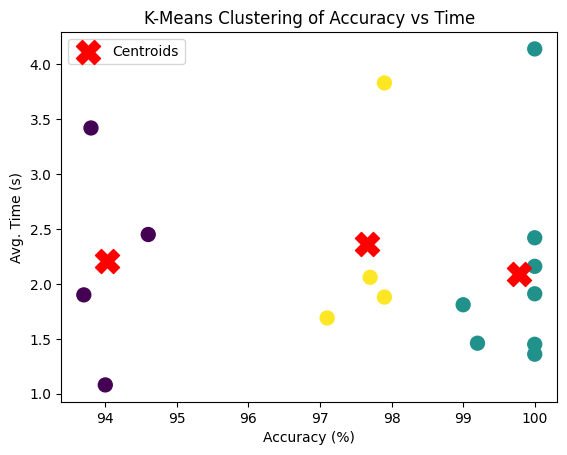

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = {
    'Accuracy': ["100%", "93.80%", "97.70%", "94.60%", "100%", "93.70%", "97.90%", "100%", 
                 "94%", "99%", "100%", "97.10%", "100%", "100%", "97.90%", "99.20%"],
    'Avg. Time': [1.91, 3.42, 2.06, 2.45, 2.42, 1.90, 3.83, 1.45, 
                  1.08, 1.81, 4.14, 1.69, 1.36, 2.16, 1.88, 1.46]
}

df = pd.DataFrame(data)

df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float)

X = df[['Accuracy', 'Avg. Time']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

print(df)

# Plot clusters
plt.scatter(df['Accuracy'], df['Avg. Time'], c=df['Cluster'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Accuracy (%)')
plt.ylabel('Avg. Time (s)')
plt.title('K-Means Clustering of Accuracy vs Time')
plt.legend()
plt.show()



SVM Accuracy: 100.00%


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


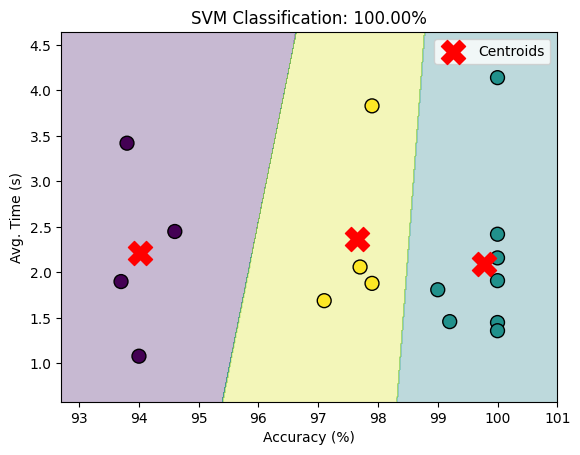

    Accuracy  Avg. Time  Cluster
0      100.0       1.91        1
1       93.8       3.42        0
2       97.7       2.06        2
3       94.6       2.45        0
4      100.0       2.42        1
5       93.7       1.90        0
6       97.9       3.83        2
7      100.0       1.45        1
8       94.0       1.08        0
9       99.0       1.81        1
10     100.0       4.14        1
11      97.1       1.69        2
12     100.0       1.36        1
13     100.0       2.16        1
14      97.9       1.88        2
15      99.2       1.46        1


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
data = {
    'Accuracy': ["100%", "93.80%", "97.70%", "94.60%", "100%", "93.70%", "97.90%", "100%", 
                 "94%", "99%", "100%", "97.10%", "100%", "100%", "97.90%", "99.20%"],
    'Avg. Time': [1.91, 3.42, 2.06, 2.45, 2.42, 1.90, 3.83, 1.45, 
                  1.08, 1.81, 4.14, 1.69, 1.36, 2.16, 1.88, 1.46]
}

df = pd.DataFrame(data)

df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float)

X = df[['Accuracy', 'Avg. Time']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X, df['Cluster'])

y_pred = svm.predict(X)
acc = accuracy_score(df['Cluster'], y_pred)
print(f"SVM Accuracy: {acc * 100:.2f}%")


x_min, x_max = X['Accuracy'].min() - 1, X['Accuracy'].max() + 1
y_min, y_max = X['Avg. Time'].min() - 0.5, X['Avg. Time'].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X['Accuracy'], X['Avg. Time'], c=df['Cluster'], s=100, cmap='viridis', edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Accuracy (%)')
plt.ylabel('Avg. Time (s)')
plt.title(f'SVM Classification: {acc*100:.2f}%')
plt.legend()
plt.show()

print(df)



Decision Tree Accuracy: 100.00%


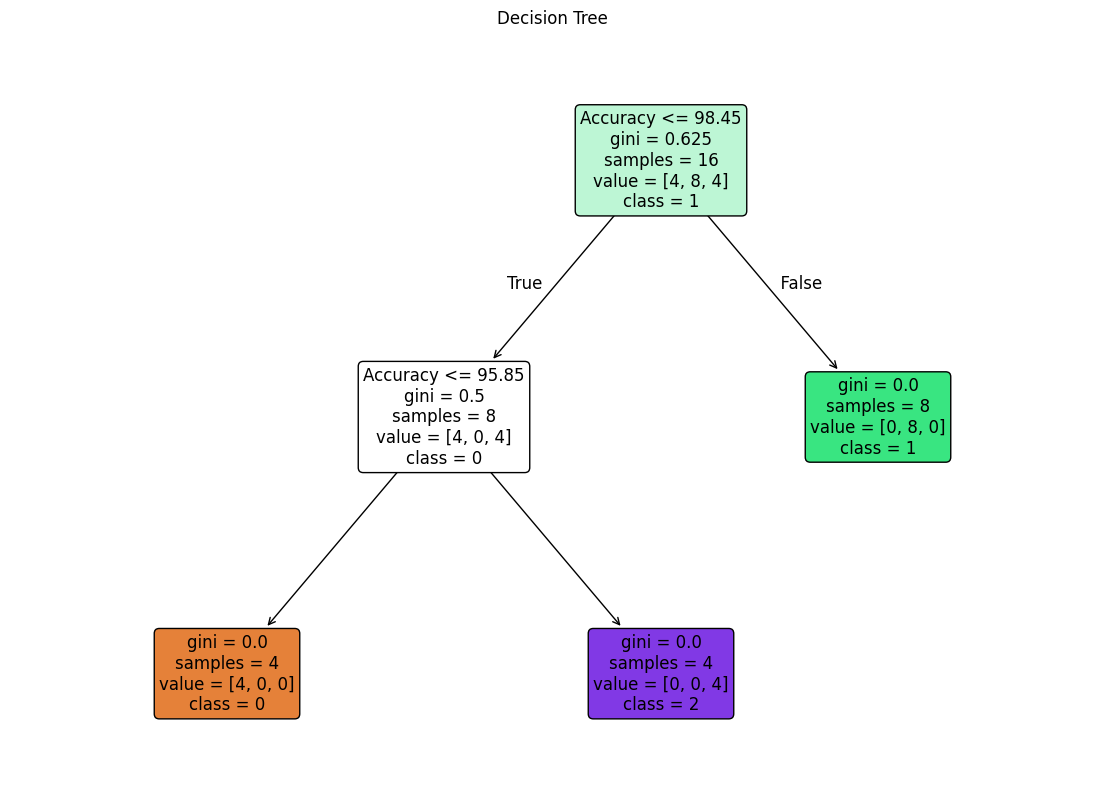

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X, df['Cluster'])


y_pred_tree = dtree.predict(X)
dtree_acc = accuracy_score(df['Cluster'], y_pred_tree)
print(f"Decision Tree Accuracy: {dtree_acc * 100:.2f}%")


plt.figure(figsize=(14, 10))
plot_tree(
    dtree, 
    feature_names=['Accuracy', 'Avg. Time'], 
    class_names=[str(i) for i in range(len(df['Cluster'].unique()))],
    filled=True, 
    rounded=True,
    fontsize=12,
    label='all'  
)
plt.title('Decision Tree')
plt.show()


SVM Confusion Matrix:
[[4 0 0]
 [0 8 0]
 [0 0 4]]


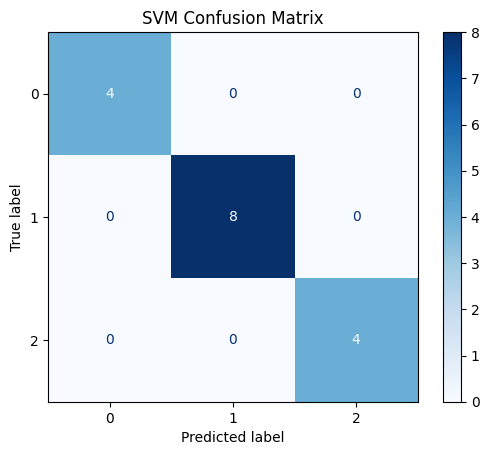

Decision Tree Confusion Matrix:
[[4 0 0]
 [0 8 0]
 [0 0 4]]


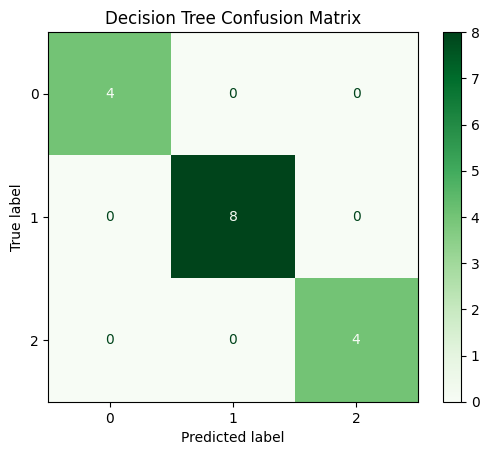

In [6]:
y_pred_svm = svm.predict(X)


y_pred_tree = dtree.predict(X)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- SVM Confusion Matrix ---
svm_cm = confusion_matrix(df['Cluster'], y_pred_svm)
print("SVM Confusion Matrix:")
print(svm_cm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=svm_cm,
                                  display_labels=[str(i) for i in range(len(df['Cluster'].unique()))])
disp_svm.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.savefig('svm_confusion_matrix.jpg')
plt.show()

# --- Decision Tree Confusion Matrix ---
dtree_cm = confusion_matrix(df['Cluster'], y_pred_tree)
print("Decision Tree Confusion Matrix:")
print(dtree_cm)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=dtree_cm,
                                   display_labels=[str(i) for i in range(len(df['Cluster'].unique()))])
disp_tree.plot(cmap='Greens')
plt.title('Decision Tree Confusion Matrix')
plt.savefig('decision_tree_confusion_matrix.jpg')
plt.show()
